In [97]:
%matplotlib  inline
import  pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn  as sns
sns.set_style('whitegrid')
sns.set_context('paper')

In [8]:
lpa_clu=pd.read_csv('chapter1data/LPA_comm0327.csv',index_col=0)
wlpa_clu=pd.read_csv('chapter1data/WLPA_comm0327.csv',index_col=0)

In [20]:
cunity={'Uweight':lpa_clu,'Weight':wlpa_clu}
cunity_values=cunity.itervalues()

In [53]:
def get_prob(df,label=None,f='count'):
    gr=df.groupby('vcount')[label].agg(f)
    gr=gr/gr.sum()
    return gr

get_st=lambda  df,la:df.groupby('vcount')[la].mean()

###  1.社区规模

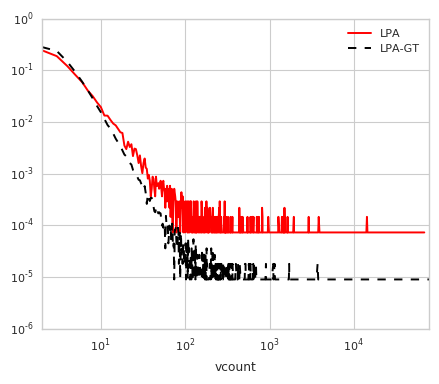

In [51]:

ax=get_prob(lpa_clu,label='density').plot(logx=True,logy=True,figsize=(5,4),label='LPA',style='-r')
get_prob(wlpa_clu,label='density')[1:].plot(logx=True,logy=True,label='LPA-GT',style='--k')
ax.legend()

# wlpa_clu.groupby('vcount')['density'].count()[1:].plot(logx=True,logy=True)

In [75]:
get_prob(lpa_clu,label='density').loc[1000:].sum()

0.020074187213615452

In [76]:
get_prob(wlpa_clu,label='density').loc[1000:].sum()

0.001441399500434212

###  2. 社区密度  
- lpa 社区密度在同等规模下社区密度较大

In [112]:
def getSome(label,ax=None,title=''):
    ax=get_st(lpa_clu,label)[2:].plot(logx=True,ax=ax,label='LPA',style='-r')
    get_st(wlpa_clu,label)[2:].plot(logx=True,ax=ax,label='LPA-GT',style='-k')
    ax.legend()
    ax.set_title(title)
    return ax

In [83]:
lpa_clu.columns

Index([u'diameter', u'density', u'cliqu_number', u'avg_path_length', u'vcount',
       u'coef', u'assortativity', u'omega', u'mean_rel'],
      dtype='object')

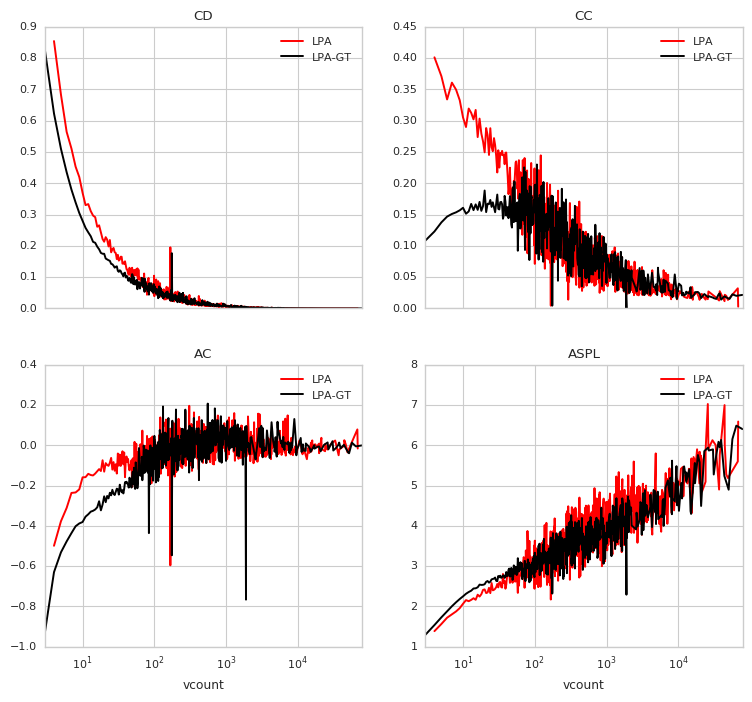

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8),sharex=True)
ax1,ax2,ax3,ax4=axes.flatten()
getSome('density',ax=ax1,title='CD')
getSome('coef',ax=ax2,title='CC')
getSome('assortativity',ax=ax3,title='AC')
getSome('avg_path_length',ax=ax4,title='ASPL')

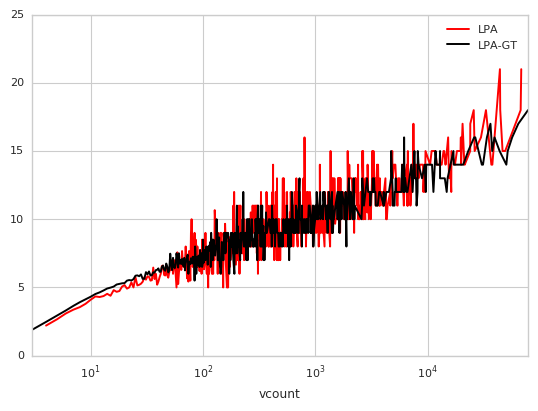

In [116]:
getSome('diameter')

### 5-2 亲属关系指数在规模上

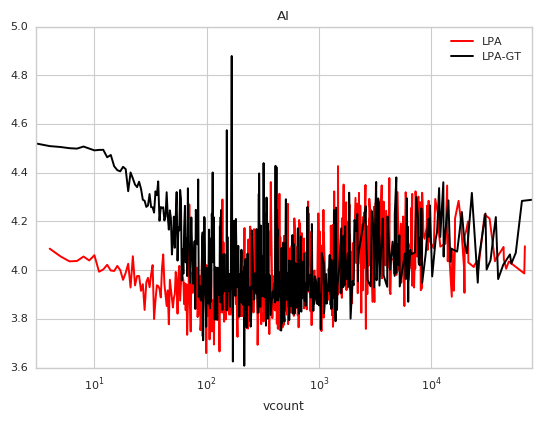

In [115]:
getSome('mean_rel',title='AI')